# Project: Real-Time Communication system powered by AI for specially abled

# Model Building

# Import The Required Model Building Libraries

In [1]:
#import imagedatagenerator
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#training datagen
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [3]:
#testing datagen
test_datagen=ImageDataGenerator(rescale=1./255)

# IMPORTING tensorflow

In [7]:
import tensorflow as tf
import os

# Initialize The Model

In [5]:
#create model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
import numpy as np
import matplotlib.pyplot as plt #to view graph in colab itself
import IPython.display as display
from PIL import Image
import pathlib

# Applying ImageDataGenerator to training set

In [21]:
x_train=train_datagen.flow_from_directory(r"C:\Users\G.G. SUNDER\Dataset\training_set",target_size=(64,64),batch_size=200,
                                          class_mode='categorical',color_mode="grayscale")

Found 15750 images belonging to 9 classes.


# Applying ImageDataGenerator to test set

In [23]:
x_test=test_datagen.flow_from_directory(r"C:\Users\G.G. SUNDER\Dataset\test_set",target_size=(64,64),batch_size=200,
                                          class_mode='categorical',color_mode="grayscale")

Found 2250 images belonging to 9 classes.


In [24]:
a=len(x_train)
b=len(x_test)

# Length of training set

In [25]:
print(a)

79


# Length of test set

In [26]:
print(b)

12


# Add Layers

In [27]:
#create model
model=Sequential()

# Add The Convolution Layer

In [28]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation='relu'))

# Add Pooling Layer



In [29]:
model.add(MaxPooling2D(pool_size=(2,2)))

# Add The Flatten Layer

In [30]:
model.add(Flatten())

# Adding The Dense Layers

In [31]:
#1st hidden layer
model.add(Dense(units=512,activation='relu'))
#2nd hidden layer
model.add(Dense(units=261,activation='relu'))

In [32]:
#output layer
model.add(Dense(units=9,activation='softmax'))

# Compile The Model

In [33]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Fit The Model



In [34]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

C:\Users\GG77DA~1.SUN\AppData\Local\Temp/ipykernel_25400/234118701.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/10
79/79 [==============================] - 70s 840ms/step - loss: 0.5017 - accuracy: 0.8386 - val_loss: 0.1866 - val_accuracy: 0.9702
Epoch 2/10
79/79 [==============================] - 64s 810ms/step - loss: 0.0576 - accuracy: 0.9828 - val_loss: 0.1900 - val_accuracy: 0.9760
Epoch 3/10
79/79 [==============================] - 63s 789ms/step - loss: 0.0222 - accuracy: 0.9945 - val_loss: 0.1994 - val_accuracy: 0.9773
Epoch 4/10
79/79 [==============================] - 63s 796ms/step - loss: 0.0150 - accuracy: 0.9963 - val_loss: 0.2027 - val_accuracy: 0.9764
Epoch 5/10
79/79 [==============================] - 63s 790ms/step - loss: 0.0206 - accuracy: 0.9935 - val_loss: 0.1526 - val_accuracy: 0.9782
Epoch 6/10
79/79 [==============================] - 63s 797ms/step - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.2039 - val_accuracy: 0.9778
Epoch 7/10
79/79 [==============================] - 63s 798ms/step - loss: 0.0114 - accuracy: 0.9968 - val_loss: 0.2557 - val_accuracy: 0.9760

# Save The Model

In [35]:
model.save('aslpng2.h5')

# Import The Packages And Load The Saved Model

In [37]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image

In [38]:
#load the model
model=load_model('aslpng2.h5')

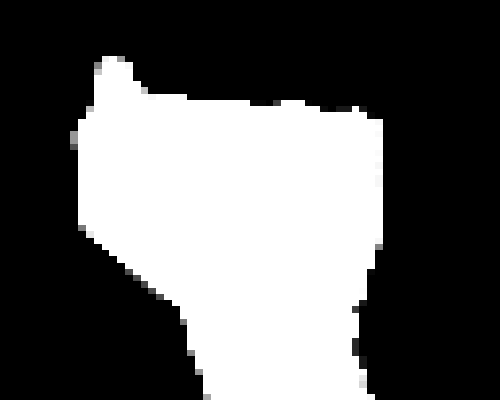

In [39]:
img=image.load_img(r"C:\Users\G.G. SUNDER\Dataset\test_set\A\54.png",target_size=(400,500))
img